In [28]:
###Load Packages

#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

# Calculate readlengths

In [10]:
#Load read data (all reads concat together)
path = "/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/prinseq/"

EV_R1 = path + "h112.R1_td.fastq.gz"
WT_R1 = path + "h113.R1_td.fastq.gz"
S4A_R1 = path + "h115.R1_td.fastq.gz"
S4D_R1 = path + "h117.R1_td.fastq.gz"
EV_R2 = path + "h112.R2_td.fastq.gz"
WT_R2 = path + "h113.R2_td.fastq.gz"
S4A_R2 = path + "h115.R2_td.fastq.gz"
S4D_R2 = path + "h117.R2_td.fastq.gz"

allreads = path + "all_reads.fastq"


In [11]:
#Function to extract read lengths from .fasta files
def getreadlengths(data):
    readlengths = []
    if data.endswith(".gz"):
        with gz.open(data, 'rt') as f:
            for line in tqdm(f):
                if (line[0][0] != 'A') & (line[0][0] != 'G') & (line[0][0] != 'C') & (line[0][0] != 'T'):
                    continue
                readlengths.append(len(line))
        return(readlengths)
    else:
        with open(data, 'rt') as f:
            for line in tqdm(f):
                if (line[0][0] != 'A') & (line[0][0] != 'G') & (line[0][0] != 'C') & (line[0][0] != 'T'):
                    continue
                readlengths.append(len(line))
        return(readlengths)

In [12]:
#all reads
rl = getreadlengths(allreads)
reads = pd.Series(rl)
rl_df = pd.DataFrame(rl)

#EV, R1
rl_EV_1 = getreadlengths(EV_R1)
reads_EV_1 = pd.Series(rl_EV_1)
rl_df_EV_1 = pd.DataFrame(rl_EV_1)
rl_df_EV_1['Replicate'] = 1

#WT, R1
rl_WT_1 = getreadlengths(WT_R1)
reads_WT_1 = pd.Series(rl_WT_1)
rl_df_WT_1 = pd.DataFrame(rl_WT_1)
rl_df_WT_1['Replicate'] = 1

#4SA, R1
rl_4SA_1 = getreadlengths(S4A_R1)
reads_4SA_1 = pd.Series(rl_4SA_1)
rl_df_4SA_1 = pd.DataFrame(rl_4SA_1)
rl_df_4SA_1['Replicate'] = 1

#4SD, R1
rl_4SD_1 = getreadlengths(S4D_R1)
reads_4SD_1 = pd.Series(rl_4SD_1)
rl_df_4SD_1 = pd.DataFrame(rl_4SD_1)
rl_df_4SD_1['Replicate'] = 1

##########
#EV, R2
rl_EV_2 = getreadlengths(EV_R2)
reads_EV_2 = pd.Series(rl_EV_2)
rl_df_EV_2 = pd.DataFrame(rl_EV_2)
rl_df_EV_2['Replicate'] = 2

#WT, R2
rl_WT_2 = getreadlengths(WT_R2)
reads_WT_2 = pd.Series(rl_WT_2)
rl_df_WT_2 = pd.DataFrame(rl_WT_2)
rl_df_WT_2['Replicate'] = 2

#4SA, R2
rl_4SA_2 = getreadlengths(S4A_R2)
reads_4SA_2 = pd.Series(rl_4SA_2)
rl_df_4SA_2 = pd.DataFrame(rl_4SA_2)
rl_df_4SA_2['Replicate'] = 2

#4SD, R2
rl_4SD_2 = getreadlengths(S4D_R2)
reads_4SD_2 = pd.Series(rl_4SD_2)
rl_df_4SD_2 = pd.DataFrame(rl_4SD_2)
rl_df_4SD_2['Replicate'] = 2


11199136it [00:09, 1218842.37it/s]
2866136it [00:07, 377973.00it/s]
1994972it [00:05, 395048.27it/s]
2138876it [00:05, 386363.73it/s]
571596it [00:01, 389553.62it/s]
1353188it [00:03, 352233.94it/s]
686964it [00:02, 336879.87it/s]
1092344it [00:03, 356109.91it/s]
495060it [00:01, 368792.47it/s]


In [13]:
print(rl_df_EV_1[0].median(),
      rl_df_EV_2[0].median(),
      rl_df_WT_1[0].median(),
      rl_df_WT_2[0].median(),
      rl_df_4SA_1[0].median(),
      rl_df_4SA_2[0].median(),
      rl_df_4SD_1[0].median(),
      rl_df_4SD_2[0].median(),
     )

908.0 1046.0 875.0 970.0 894.0 1024.0 883.0 990.0


In [15]:
allreads_l = getreadlengths(allreads)
reads_all_l = pd.Series(allreads_l)
rl_df = pd.DataFrame(reads_all_l)

11199136it [00:09, 1206365.73it/s]


Text(0, 0.5, 'Read counts')

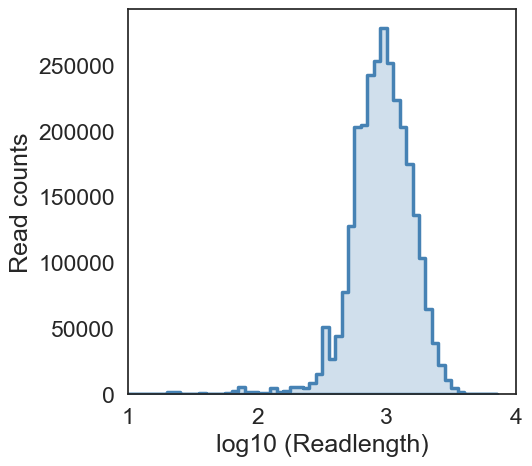

In [17]:
#Plot the readlength distribution of all reads together
fig, (ax1) = plt.subplots(1,1, figsize = (5, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

sns.histplot(data = np.log10(rl_df), binwidth = 0.05, element="step", ax = ax1, legend = False, lw=2.5, palette=['steelblue'])
ax1.set_xlim(1,4)
ax1.set_xlabel('log10 (Readlength)')
ax1.set_ylabel('Read counts')

#Save plot as jpeg if using

In [20]:
#General read info - min, max, median
print(
    "Minimum readlength: " + str(rl_df.min()[0]) + "\n" +
    "Maximum readlength: " + str(rl_df.max()[0]) + "\n" +
    "Median readdlength: " + str(rl_df.median()[0]) + "\n")

Minimum readlength: 2
Maximum readlength: 6457
Median readdlength: 934.0



# Calculate gene coverage

In [22]:
# Define a function to get a dataframe of coverage for each gene

def get_gene_cov(file, gene, condition):
    data_bedtool = pybedtools.BedTool(file)
    genes_bedtool = pybedtools.BedTool(genes)
    
    df = genes_bedtool.coverage(data_bedtool).to_dataframe(names = ['chr', 'start', 'end', 'name', 'score', 'strand', 'nReadsPerGene', 'nBasesPerGeneCovered', 'geneLength', 'fracBasesPerGeneCovered']) # column 6 is coverage count - how many reads from the data file overlap at each region (gene) in the genes file
    df['sample'] = condition
    
    return df

In [23]:
path = "/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/"
genes = "/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/config/only_genes.bed"

In [24]:
h112_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "EV")
h112_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "EV")
h113_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "WT")
h113_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "WT")
h115_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SA")
h115_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SA")
h117_R1_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SD")
h117_R2_cov = get_gene_cov(path + "mapping/h112.R1_hg38.bed", genes, "4SD")

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/mapping/h112.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/mapping/h112.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutants_sequencing/Data_processing/Exp10/results/mapping/h112.R1_hg38.bed has inconsistent naming convention for record:
GL000009.2	34651	36797	m64146_210430_195255/18284941/ccs	16	-	34651	36797	255,0,0	1	2146	0

***** WARNING: File /Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp10_PABPN1_mutan

In [25]:
all_cov = pd.concat([h112_R1_cov,
                     h112_R2_cov,
                     h113_R1_cov,
                     h113_R2_cov,
                     h115_R1_cov,
                     h115_R2_cov,
                     h117_R1_cov,
                     h117_R2_cov])

(0.5, 6.0)

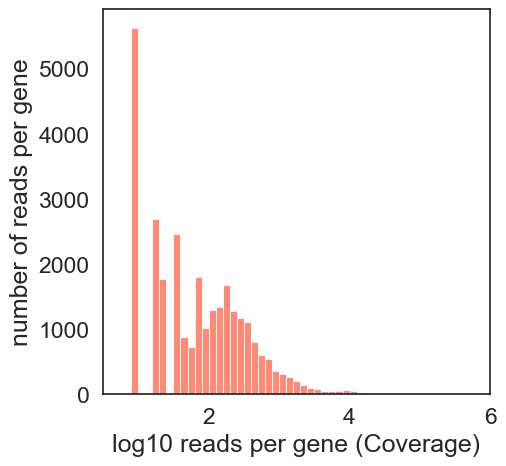

In [30]:
all_cov_grouped = all_cov.groupby("name").sum()

f, ax = plt.subplots(1,1, figsize = (5,5))
sns.histplot(x = np.log10(all_cov_grouped.loc[all_cov_grouped["nReadsPerGene"] >= 1]["nReadsPerGene"]), color = "tomato", binwidth = 0.1)
ax.set_xlabel("log10 reads per gene (Coverage)")
ax.set_ylabel("number of reads per gene")

ax.set_xlim(0.5,6)

In [35]:
len(all_cov_grouped.loc[all_cov_grouped.nReadsPerGene > 100])

11651